In [1]:
import glob
import torch
from sklearn.manifold import TSNE
import glob
import json
import pandas as pd
import seaborn as sns
import argparse
import matplotlib.pyplot as plt

In [ ]:
embed_res = glob.glob("./results/*/*.pt")
embed_meta_res = glob.glob("./results/*/*/*/metadata.tsv")

In [ ]:
for embed, meta in zip(embed_res, embed_meta_res):
    print("plotting ", embed)
    embed_ckpt = torch.load(embed).numpy()
    cell_labels = []
    with open(meta) as handle:
        for line in handle.readlines():
            cell_labels.append(int(line.strip().split("-")[0]))
    
    with open(embed.replace("embed.pt", 'id2cell.json'),'r') as handle:
        id2cell = json.load(handle)
    cell_labels = [id2cell[str(lb)] for lb in cell_labels]
    tsne = TSNE(verbose=1)
    embed_transform = tsne.fit_transform(embed_ckpt)
    
    embed_df = pd.DataFrame(embed_transform)
    embed_df.columns = ['tsne_one', 'tsne_two']
    embed_df['cell_type'] = cell_labels
    plt.figure(figsize=(16,10))
    sns.scatterplot(x='tsne_one', y='tsne_two',\
                   data=embed_df, hue='cell_type',\
                   palette=sns.color_palette("hls", 9))
    plt.savefig(embed.replace('.pt', 'tsne_embed'))

In [1]:
import anndata
import os
import scanpy as sc

In [2]:
data_ref = './data/baron_2016h.h5ad'
data_trg = "./data/xin_2016.h5ad"
adata_ref = anndata.read_h5ad(data_ref)
adata_trg = anndata.read_h5ad(data_trg)

In [3]:
sc.pp.filter_genes(adata_ref, min_counts=1)

In [21]:
import torch
torch.tensor(adata_ref.X)

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [4]:
shared_genes = adata_ref.var_names[adata_ref.var_names.isin(adata_trg.var_names)]

In [5]:
adata_ref = adata_ref[:, adata_ref.var_names.isin(shared_genes)]
adata_trg = adata_trg[:, adata_trg.var_names.isin(shared_genes)]

In [6]:
adata_ref = adata_ref[:, adata_ref.var_names.argsort()].copy()
adata_trg = adata_trg[:, adata_trg.var_names.argsort()].copy()
assert all(adata_ref.var_names == adata_trg.var_names)

In [7]:
from utils import select_gene
gene_mask = select_gene(adata_ref.X, num_gene=1000, threshold=0)

Chosen offset: 0.45


In [66]:
import json
import matplotlib.pyplot as plt
import os
from sklearn.metrics import auc

./results/baron_2016h_labelled_99/MLP_100-50_metric/log.json
./results/baron_2016h_labelled_20/MLP_100-50_metric/log.json
./results/baron_2016h_labelled_15/MLP_100-50_metric/log.json
./results/baron_2016h_labelled_5/MLP_100-50_metric/log.json


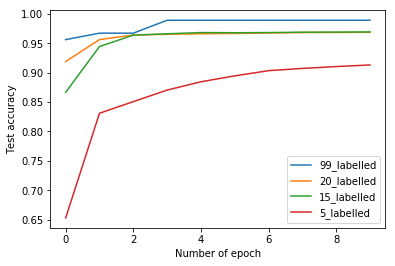

In [73]:
log_dir = glob.glob("./results/baron_2016h_labelled_*/*/log.json")
log_dir_srt = sorted(log_dir, key = lambda x: -int(x.split("/")[2].split("_")[-1]))
for file in log_dir_srt:
    print(file)
    legend_flag = file.split("/")[2].split("_")[-1]
    with open(file) as f:
        results = json.load(f)
        log = results['log']
        test_acc = []
        for i in range(1,len(log),2):
            test_acc.append(log[i]['test_acc'])
        plt.plot(list(range(10)), test_acc, label='{}_labelled'.format(legend_flag))
plt.legend()
plt.xlabel("Number of epoch")
plt.ylabel("Test accuracy")#
plt.savefig(file.replace("/".join(file.split("/")[-2:]),"test_acc_plot"))

In [74]:
file.replace("/".join(file.split("/")[-2:]),"test_acc_plot")

'./results/baron_2016h_labelled_5/test_acc_plot'

In [77]:
data_name = "_".join(file.split("/")[2].split("_")[0:-2])

In [79]:
os.path.join("./result", data_name, "test_acc_plot")

'./result/baron_2016h/test_acc_plot'

In [86]:
glob.glob("results_paired/macosko_2015_labelled_*5_shekhar_2016/")

['results_paired/macosko_2015_labelled_15_shekhar_2016/',
 'results_paired/macosko_2015_labelled_5_shekhar_2016/']